<a href="https://colab.research.google.com/github/Jeanneweb1204/Learning-Styles-Quiz/blob/master/Homework_L10_Data_Visualisation_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

Let’s take the data-visualisation techniques we learned and use them on a real dataset you’re already familiar with. You’ll see how visualisation speeds up data cleaning, helps us spot patterns faster, and makes communicating insights much easier.

# **Apartment cost and sizes in Germany**

**Where is the data from?**

The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.
The scraping process is described in this blog post and the corresponding code for scraping and minimal processing afterwards can be found in this Github repo.
At a given time, all available offers were scraped from the site and saved. This process was repeated three times, so the data set contains offers from the dates 2018-09-22, 2019-05-10 and 2019-10-08.

**Content**

The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

**Inspiration**

Did rents increase over time? Which areas are the most expensive? Which areas saw the largest increase, which areas became cheaper? Are there any duplicates? How many? What could be gained from a text analysis of the free text variables?

**Acknowledgements**

The data belongs to www.immobilienscount24.de and is for research purposes only. The data was created with .


**Here you can find the data -->**

https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany


Let's first read the data:

In [3]:
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("corrieaar/apartment-rental-offers-in-germany")
csv_path = f"{path}/immo_data.csv"
df = pd.read_csv(csv_path)

100%|██████████| 93.0M/93.0M [00:05<00:00, 16.7MB/s]

Extracting files...


### Is the dataset complete?

1. Let's check **% of null values for each column** using a *barplot*

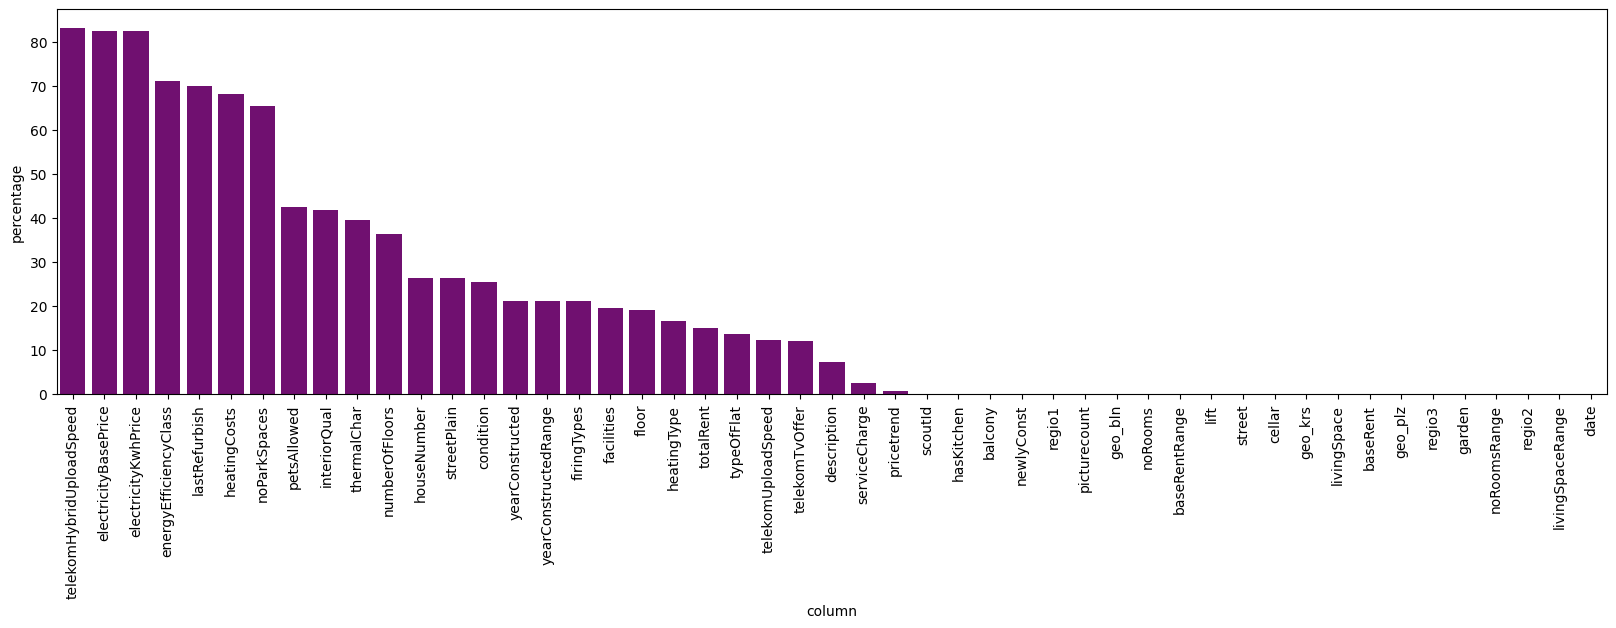

In [16]:
# df.isna()
null_values = df.isna().sum()
null_values_percentage = (null_values / len(df) * 100).sort_values(ascending=False)
missing_values_df = pd.DataFrame({"column": null_values_percentage.index, "percentage": null_values_percentage.values})
missing_values_df = missing_values_df.reset_index(drop=True)
plt.figure(figsize=(20,5))
sns.barplot(x="column", y="percentage", data=missing_values_df, color= "purple")
plt.xticks(rotation=90)
plt.show()





2. **Number of listings per date** (to check whether some dates have too little data to be meaningful, or whether the timeline is unevenly populated and could distort the overall picture) using a *lineplot*

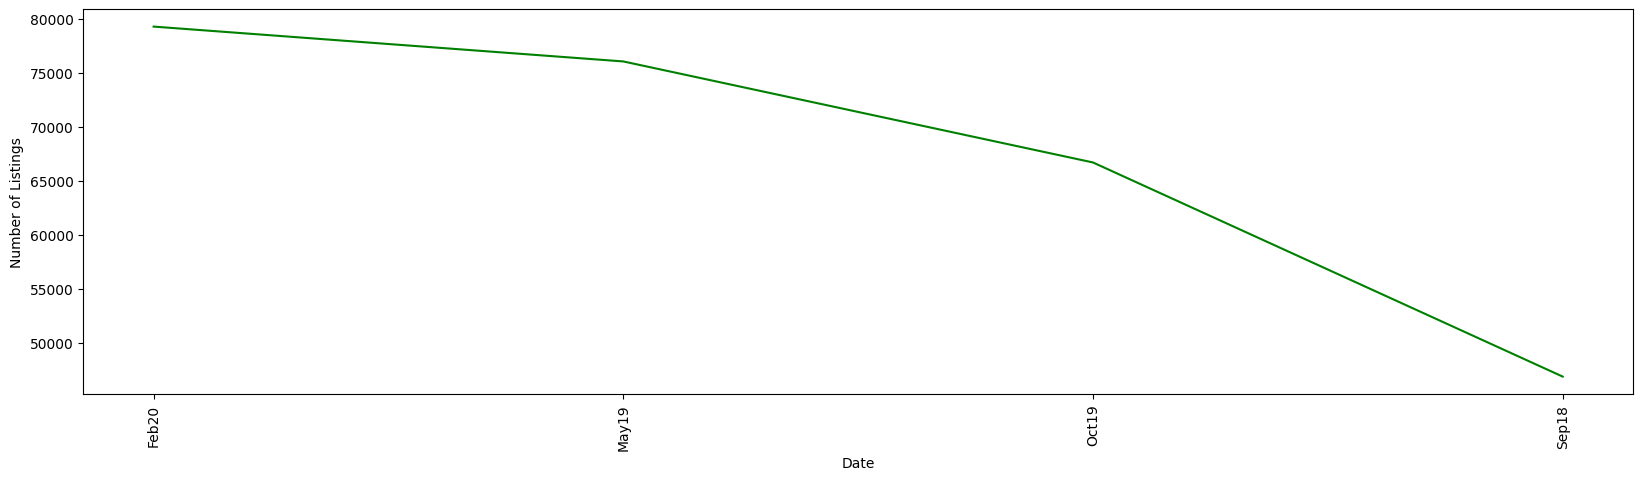

In [21]:
list_per_date = df["date"] .value_counts()
list_per_date
plt.figure(figsize=(20,5))
sns.lineplot(x=list_per_date.index, y=list_per_date.values, color= "green")
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)

plt.show()

3. Let's check which **condition types** are the flats in, using *countplot*

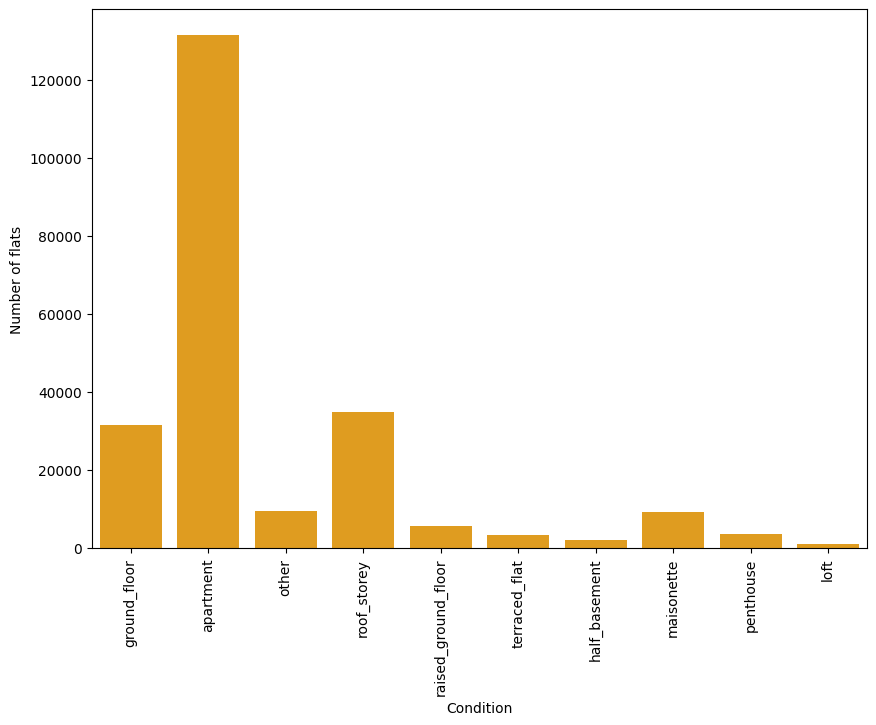

In [31]:
condition_type = df['typeOfFlat'] .value_counts()
condition_type
plt.figure(figsize=(10,7))
sns.countplot(x='typeOfFlat', data=df, color= "orange")
plt.xlabel("Condition")
plt.ylabel("Number of flats")
plt.xticks(rotation=90)
plt.show()

### Statistical analysis

1. *Heatmap* showing the **correlation coefficients** between all numeric fields in the dataset.

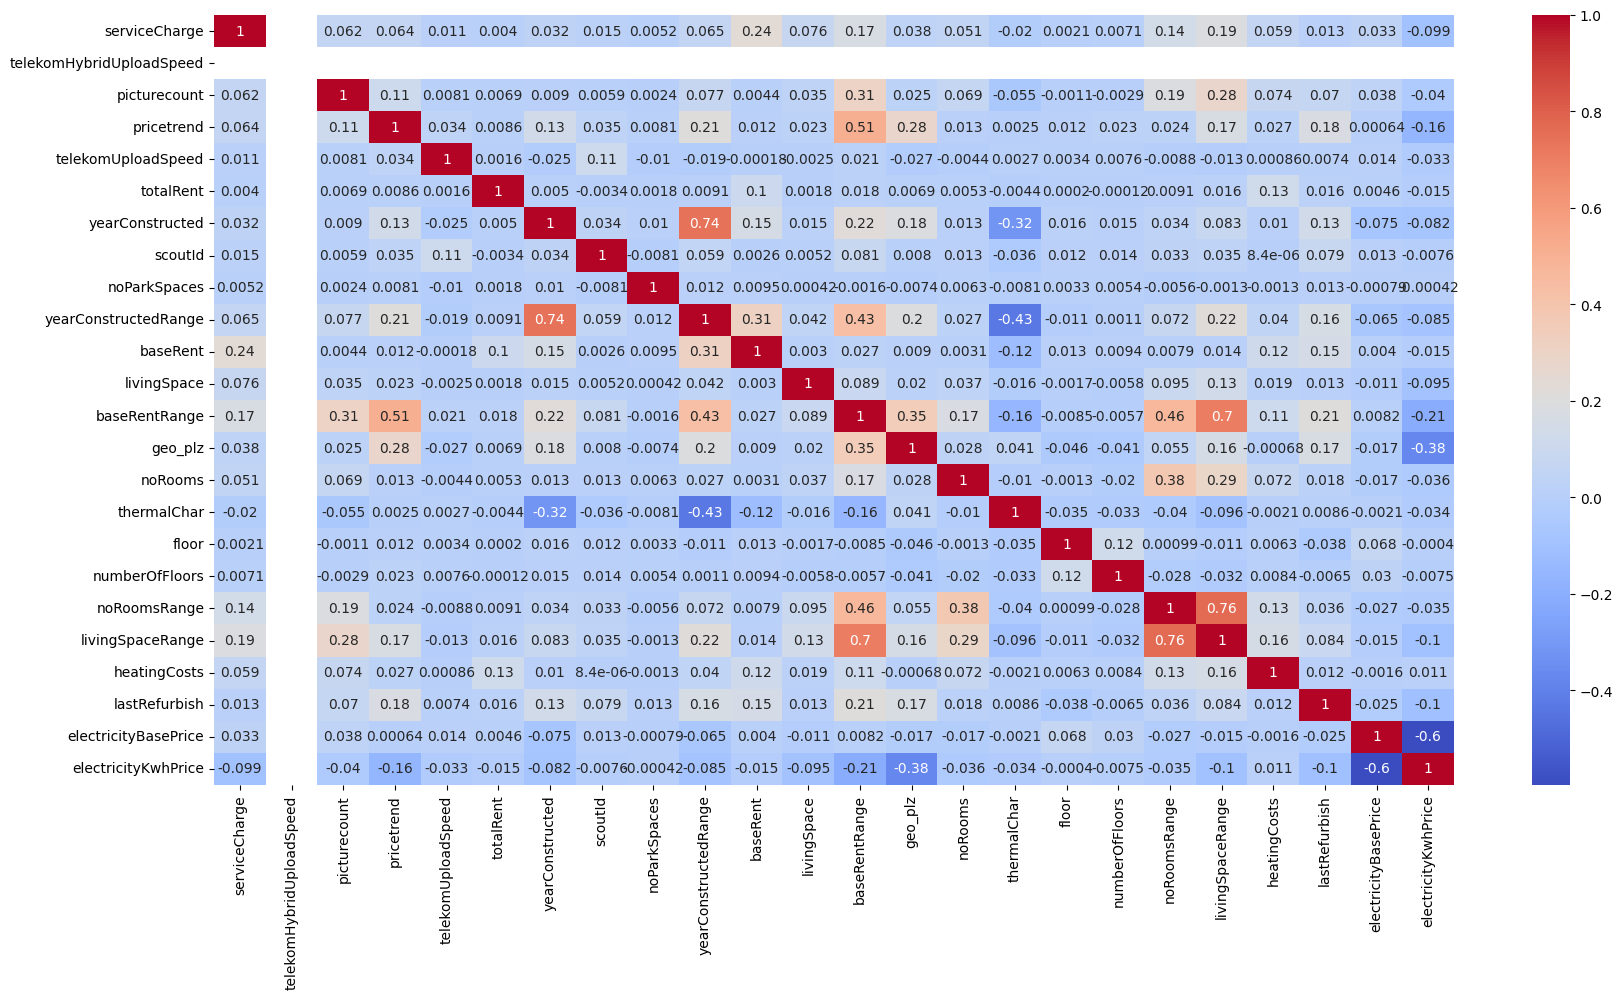

In [34]:
num_df= df.select_dtypes(include=["int64", "float64"])
num_df.head()
corr = num_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

2. *Scatterplot* of **living space vs total rent for Berlin**

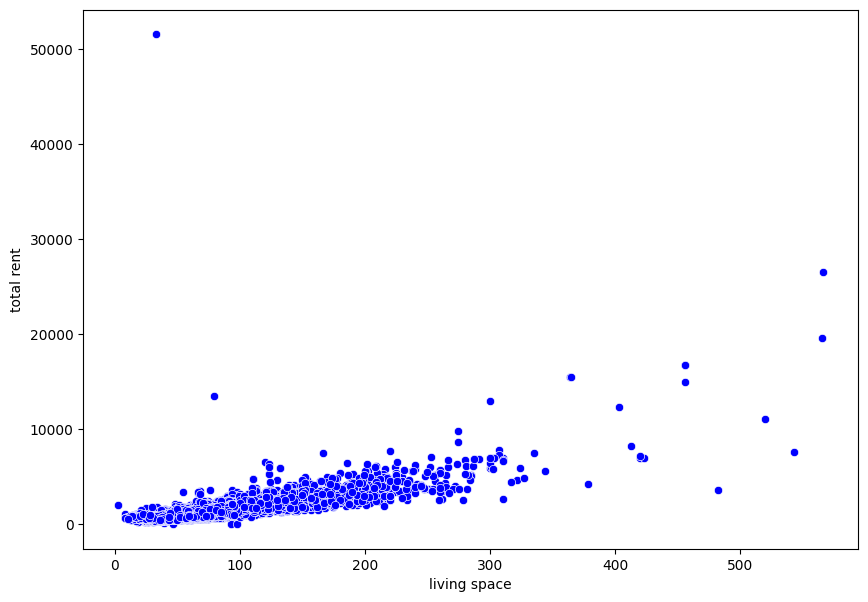

In [39]:
living_space = df[df['regio2'] == "Berlin"]["livingSpace"]
living_space
total_rent = df[df["regio2"] == "Berlin"]["totalRent"]
total_rent
plt.figure(figsize=(10,7))
sns.scatterplot(x=living_space, y=total_rent, color= "Blue")
plt.xlabel("living space")
plt.ylabel("total rent")
plt.show()


3. *Histogram* of **total rent values** for Berlin

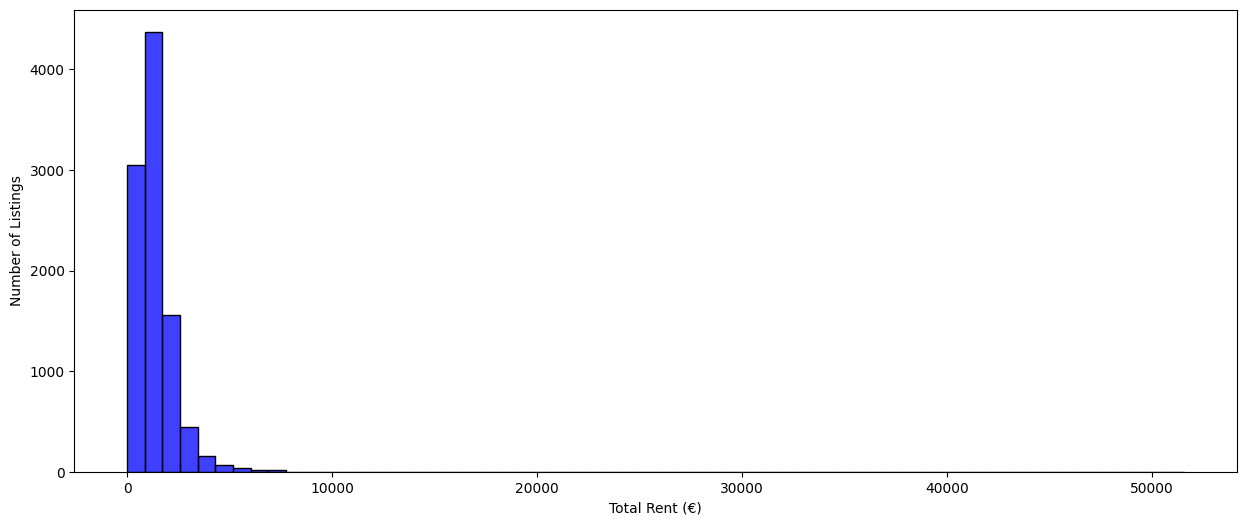

In [51]:
berlin_total_rent = df[df["regio2"] == "Berlin"]["totalRent"]
berlin_total_rent
plt.figure(figsize=(15,6))
sns.histplot(x=berlin_total_rent,bins=60, color= "Blue")
plt.xlabel("Total Rent (€)")
plt.ylabel("Number of Listings")
plt.show()

### Additional Questions

1. Create a heatmap after removing outliers and entries with 0 values. Does the correlation pattern change, and why?

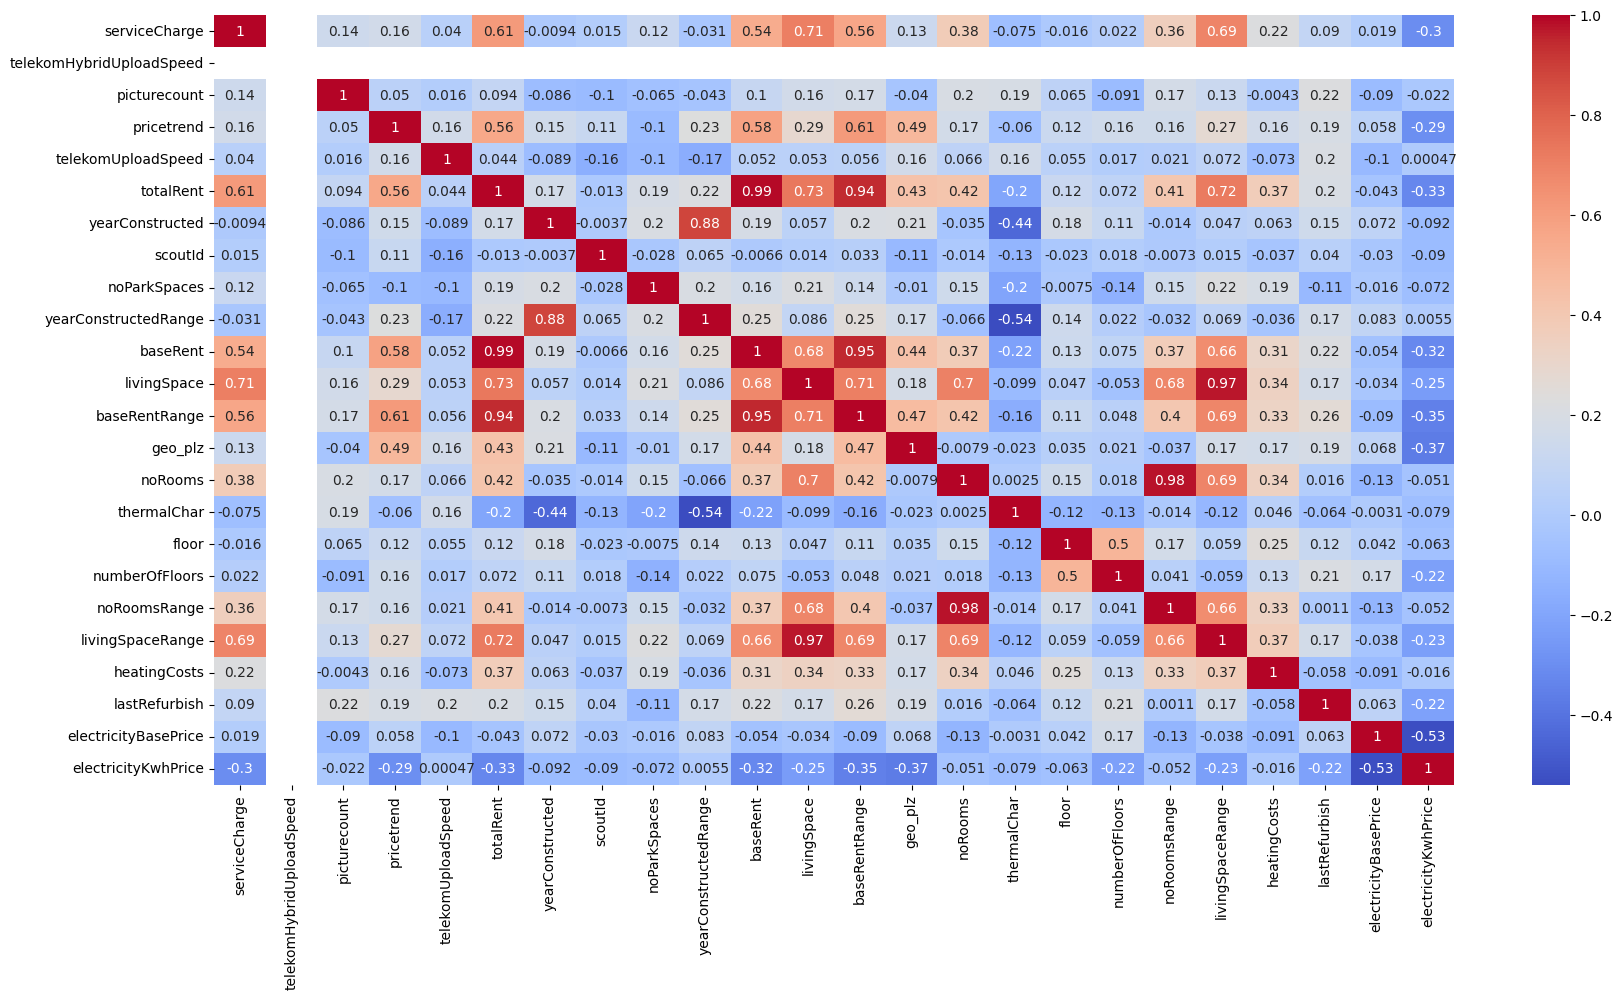

In [18]:
remove_outliers = df[(df["livingSpace"] > 0) & (df["totalRent"] > 0)]
df_cleaned = remove_outliers.copy()
num_col_for_outlier_removal = remove_outliers.select_dtypes(include=["int64", "float64"]).columns

for col in num_col_for_outlier_removal :
    lower = remove_outliers[col].quantile(0.01)
    upper = remove_outliers[col].quantile(0.99)
    remove_outliers = remove_outliers[(remove_outliers[col] >= lower) & (remove_outliers[col] <= upper)]

num_df_filtered = remove_outliers.select_dtypes(include=["int64", "float64"])
corr_pattern = num_df_filtered.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_pattern, annot=True, cmap="coolwarm")
plt.show()

yes ,the correlation pattern changes after removing outliers and entries with 0 values because when the unrealistic value are removed ,the correlation reflect true data pattern

2. Draw scatterplots for two more variable pairs that show high correlation or seem interesting to explore further.

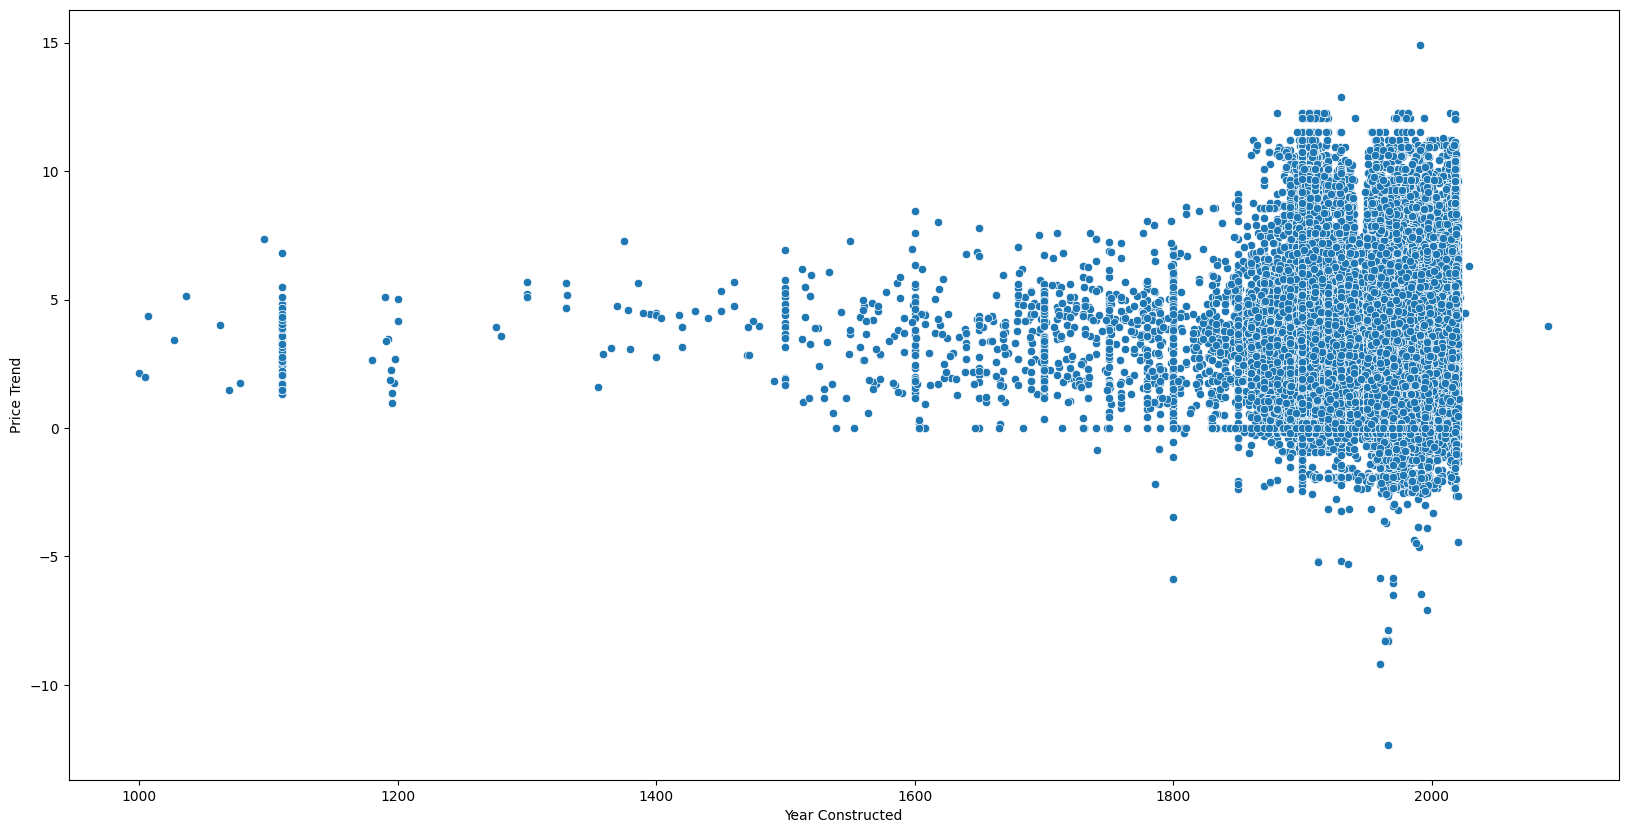

In [23]:

# --- Scatterplot 1: yearConstructed vs priceTrend ---
year_built = df["yearConstructed"]
year_built
price_trend = df["pricetrend"]
price_trend
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="yearConstructed", y="pricetrend")
plt.xlabel("Year Constructed")
plt.ylabel("Price Trend")
plt.show()



3. Calculate and visualize the average price for each apartment condition to see how it affects pricing.

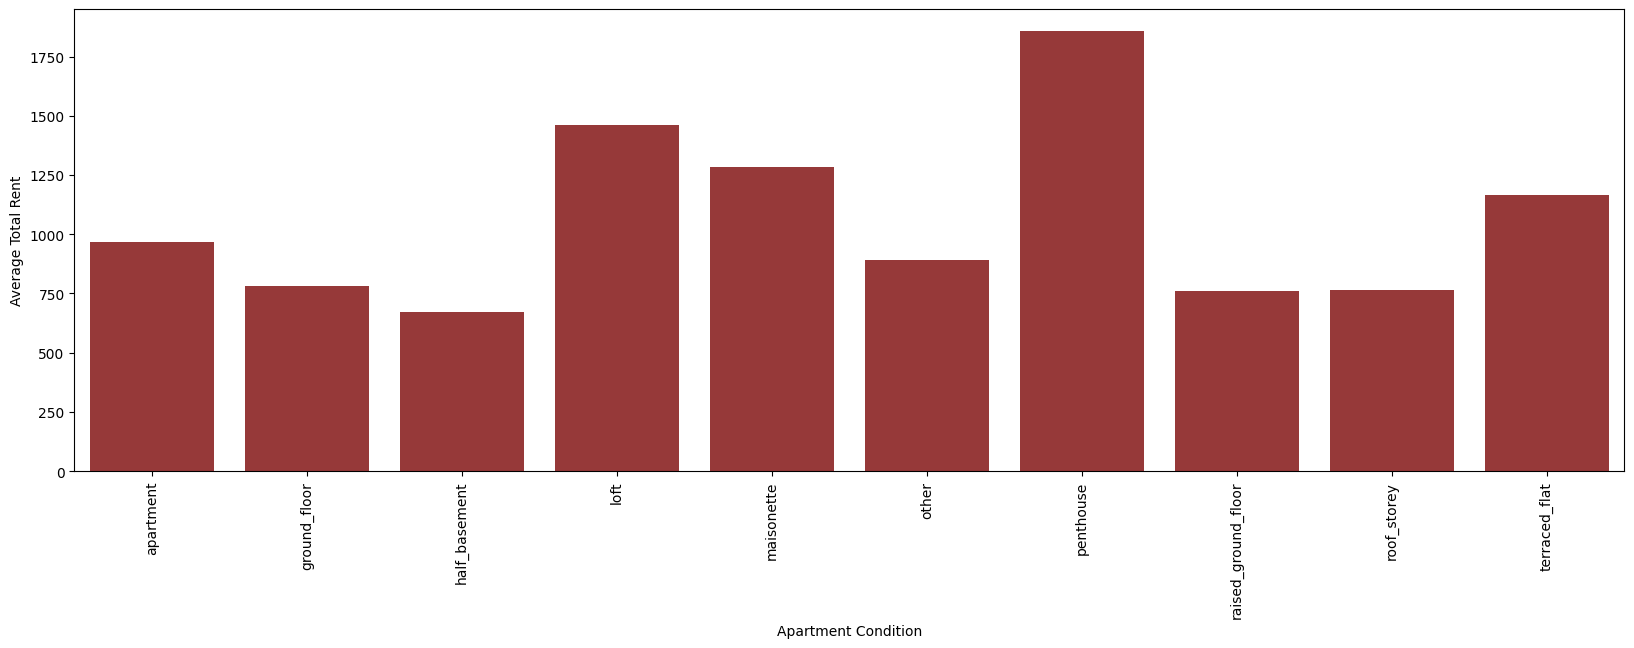

In [29]:
avg_price_per_condition = df.groupby("typeOfFlat")["totalRent"].mean()
avg_price_per_condition = avg_price_per_condition.reset_index()
avg_price_per_condition

plt.figure(figsize=(20,6))
sns.barplot(data=avg_price_per_condition, x="typeOfFlat", y="totalRent" , color= "brown")
plt.xlabel("Apartment Condition")
plt.ylabel("Average Total Rent")
plt.xticks(rotation=90)
plt.show()

4. Examine the correlation between the number of listing pictures and price. Could this be coincidence, or is there a reason behind it?

penthouses ,lofts,maisonettes have the highest rent because usually they offer more space ,better views .
Ground-Floor and basement flats are the cheapest because they get less sunlight and less privacy

terraced flat also are pricey because they do have sometimes a private entrance,
